# Simple Implementation of [DryBean](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset) dataset


In [82]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime 


dataLen = 13611

In [83]:
def loadxlsx(fileName, dataLen):
    """
    loads a file.xsl into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



     # Load the xlsx file
    excel_data = pd.read_excel(fileName)
    # Read the values of the file in the dataframe
    df = pd.DataFrame(excel_data)
    

    data= df.to_numpy()

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadxlsx('dryBean-data/Dry_Bean_Dataset.xlsx', dataLen)
print(dataSetInput[0])
print(dataSetClass[0])

[2.83950000e+04 6.10291000e+02 2.08178117e+02 1.73888747e+02
 1.19719142e+00 5.49812187e-01 2.87150000e+04 1.90141097e+02
 7.63922518e-01 9.88855999e-01 9.58027126e-01 9.13357755e-01
 7.33150614e-03 3.14728917e-03 8.34222388e-01 9.98723889e-01]
SEKER


# Normalize the data

mean:  [5.30482845e+04 8.55283459e+02 3.20141867e+02 2.02270714e+02
 1.58324198e+00 7.50894929e-01 5.37682002e+04 2.53064220e+02
 7.49732787e-01 9.87142844e-01 8.73281831e-01 7.99863682e-01
 6.56360851e-03 1.71594733e-03 6.43590181e-01 9.95063312e-01]
std:  [2.93230185e+04 2.14281824e+02 8.56910379e+01 4.49684393e+01
 2.46669394e-01 9.19983835e-02 2.97738220e+04 5.91749462e+01
 4.90845636e-02 4.66020796e-03 5.95177014e-02 6.17111960e-02
 1.12795679e-03 5.95852967e-04 9.89925138e-02 4.36629734e-03]


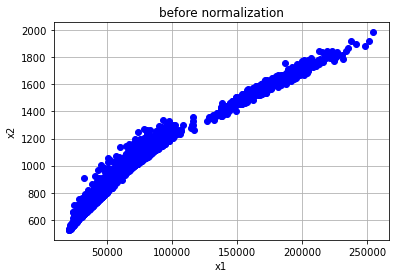

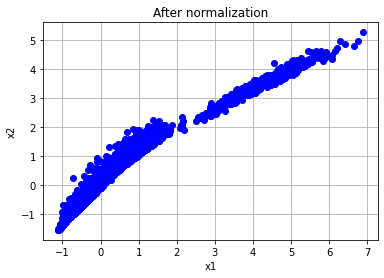

In [84]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [85]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
classL = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
dataSetOutput =generateOuput(classL, dataSetClass)
print(dataSetOutput[10050])
    

[0. 0. 0. 0. 0. 1. 0.]


# Adding Bias

In [86]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [87]:
# split into train and test
rand = np.random.rand(dataLen) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(6768, 17)
(6843, 17)
(6768, 7)
(6843, 7)


# Activation Functions

In [88]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (17, 50)


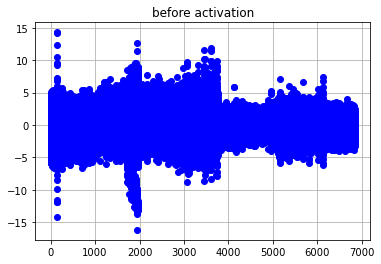

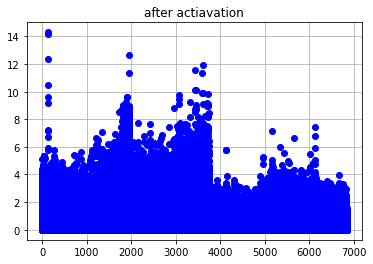

W.shape= (50, 7)


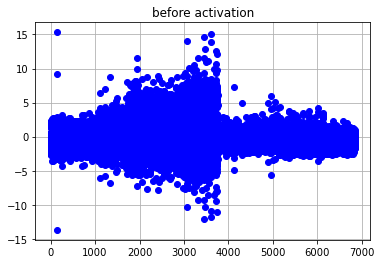

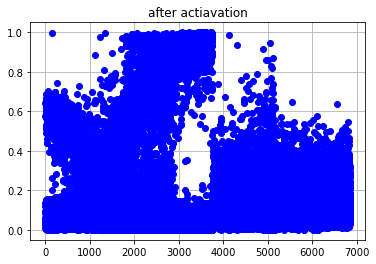

In [89]:
#init weights 
hiddenLayerSizes = [50, 7]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [90]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [91]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
outputFlow_list = forward(dataSetInput)
for i in range(len(outputFlow_list)): 
    print("flow[", i, ']=', outputFlow_list[i][:1])
    print("flow[", i, ']=', outputFlow_list[i].shape)

flow[ 0 ]= [[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039
  -0.84145059 -1.0633406   0.28908744  0.36761343  1.42386707  1.8391164
   0.68078638  2.40217287  1.92572347  0.83837103  1.        ]]
flow[ 0 ]= (6843, 17)
flow[ 1 ]= [[-0.51324823 -1.85994053  1.16432497 -1.20807291  1.86578579  0.39678806
   1.01479655  1.07168944  1.58510708 -1.67093054 -1.3107825  -1.54108512
  -0.36742217  0.45846463  0.8331826  -2.96522515 -1.3337885   0.07637205
  -2.72426332  0.4959669   0.43356229 -2.09078841 -0.78576362 -0.36946677
   1.46411683  0.35440139 -3.774464    0.00878547 -4.83198934 -0.26044946
  -1.57471478  2.25366968 -0.56645884  1.0175724  -1.14248819 -2.26263762
  -0.1084091  -0.07479944 -2.8382773   0.43944429 -5.04535553  0.54552518
   2.27783095 -1.67618982  3.0987459  -1.46500449  3.65723044 -1.75278188
   3.53331955 -2.73410245]]
flow[ 1 ]= (6843, 50)
flow[ 2 ]= [[-5.13248229e-04 -1.85994053e-03  1.16432497e+00 -1.20807291e-03
   1.86578579e+00  3.96788

# BackPropagation

In [92]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [93]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [94]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [95]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        outputFlow_list = forward(dataSetTestInput)
        #evaluationg score
        score = test(dataSetTestOutput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

In [96]:
epochs = 300
lr = .4
train(epochs, lr)



Epoch:  0 , Loss= 4.335131079257854 , Score= 0.5100472813238771
Epoch:  1 , Loss= 2.085371385966994 , Score= 0.5641252955082743
Epoch:  2 , Loss= 2.1700059790828394 , Score= 0.6440602836879432
Epoch:  3 , Loss= 2.2303367263841687 , Score= 0.664598108747045
Epoch:  4 , Loss= 1.490470954726367 , Score= 0.7195626477541371
Epoch:  5 , Loss= 1.721615813673475 , Score= 0.6942966903073287
Epoch:  6 , Loss= 1.6732927689904467 , Score= 0.7355200945626478
Epoch:  7 , Loss= 1.6761241326443326 , Score= 0.7609338061465721
Epoch:  8 , Loss= 1.913362180600016 , Score= 0.8651004728132388
Epoch:  9 , Loss= 0.7747324675375415 , Score= 0.8658392434988179
Epoch:  10 , Loss= 0.7697064999364608 , Score= 0.8262411347517731
Epoch:  11 , Loss= 0.8601143225023123 , Score= 0.7791075650118203
Epoch:  12 , Loss= 1.3970774714185232 , Score= 0.7776300236406619
Epoch:  13 , Loss= 1.9117137637432806 , Score= 0.8776595744680851
Epoch:  14 , Loss= 0.6823374659726847 , Score= 0.879580378250591
Epoch:  15 , Loss= 0.684266

/tmp/ipykernel_25267/3157257820.py:31: RuntimeWarning: invalid value encountered in true_divide
  d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))


Epoch:  28 , Loss= 0.9955684646686703 , Score= 0.1502659574468085
Epoch:  29 , Loss= nan , Score= 0.1502659574468085
Epoch:  30 , Loss= nan , Score= 0.1502659574468085
Epoch:  31 , Loss= nan , Score= 0.1502659574468085
Epoch:  32 , Loss= nan , Score= 0.1502659574468085
Epoch:  33 , Loss= nan , Score= 0.1502659574468085
Epoch:  34 , Loss= nan , Score= 0.1502659574468085
Epoch:  35 , Loss= nan , Score= 0.1502659574468085
Epoch:  36 , Loss= nan , Score= 0.1502659574468085
Epoch:  37 , Loss= nan , Score= 0.1502659574468085
Epoch:  38 , Loss= nan , Score= 0.1502659574468085
Epoch:  39 , Loss= nan , Score= 0.1502659574468085
Epoch:  40 , Loss= nan , Score= 0.1502659574468085
Epoch:  41 , Loss= nan , Score= 0.1502659574468085


KeyboardInterrupt: 

max-score= 0.889775413711584
avg-score= 0.573215692896544
min-loss= nan


NameError: name 'epochs' is not defined

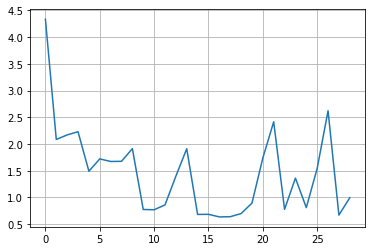

In [97]:
print("max-score=", np.max(scoreL))
print("avg-score=", np.average(scoreL))
print("min-loss=", np.min(lossL))

fig = plt.figure()
plt.plot(lossL)
plt.grid(True)
plt.title(f"Loss Function_epoch{epochs}_lr{lr}")
plt.show()
fig.savefig(f'loss_epoch{epochs}_lr{lr}_{ datetime.datetime.now()}.jpg', bbox_inches='tight', dpi=150)

fig = plt.figure()
plt.plot(scoreL)
plt.grid(True)
plt.title(f"Scoreepoch{epochs}_lr{lr}")
fig.savefig(f'score_epoch{epochs}_lr{lr}_{ datetime.datetime.now()}.jpg', bbox_inches='tight', dpi=150)
plt.show()



In [117]:
import os
import datetime

epochs = 100
lr = .3
def creatDirectory(path, params):
    '''
    creates a new directory to save figures and scores with input params a dictionary
    '''
    direc = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}"

    if not os.path.exists(path + direc):
        os.makedirs(path + direc)

    return path + direc


params = {'epochs': epochs, 'lr': lr}
newDirec = creatDirectory(f"./train-dryBean/", params)


'./train-dryBean/2022-04-20-00-47-26_epoch=100_lr0.3'

In [100]:
import datetime

datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

'2022-04-20-00-32-27'